# Applciation of Stein Variational Policy Gradient to Materials Synthesis

Here with this notebook we take the output from the SVPG, plot results, and test the trained agents in the environment, as well as inspect the policies themselves. Note that the data is a newer run than that in the manuscript and therefore is not identical; but the same trends are observed. 

In [28]:
#Import necessary modules and write some helper functions
import os
import time
import sys


import collections
import random
from collections import deque
from copy import deepcopy
import itertools
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import tensorflow as tf
import gym
import kmc_env
from kmc_env.envs import KmcEnv #this is the environment object
from kmc_env.envs.kmcsim_state_funcs import get_state_reward,get_incremented_rates,gaussian

from utils import *


# Stochasticity Benchmarking

Here we simply test the simulation for different diffusion rates to get an idea of the stochasticity

In [29]:
#Initialize the environment

target_roughness=0.80

wdir = r'../kmc_env/envs/data' #working director for the simulations. 
results_folder = r'../results/'
env = KmcEnv(target_roughness=target_roughness,
             reward_type='gaussian',reward_multiplier=50,reward_tolerance=0.07,
             rates_spread=0.1,rates_adjustment=5,folder_with_params=wdir)


  0%|          | 0/10 [00:00<?, ?it/s]

current rates:[0.25      0.25      0.4472047 0.44275   0.44121  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 235
time, iteration, number of atoms
0.0 0 625
2.0042868865972143 378 940
4.006951100482659 786 1261
6.009128479947623 1219 1586
8.020571980525554 1666 1917
10.023347680447452 2083 2225
End of simulation
12.003669448832195 2515 2563
current rates:[0.25     0.25     0.445945 0.4405   0.4395  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 204
time, iteration, number of atoms
0.0 0 601
2.001010517125852 395 881
4.003354343202672 902 1219
6.003898619984708 1401 1529
8.012257950473543 1887 1845
10.016109486731503 2396 2168
End of simulation
12.001815872243567 2874 2487
current rates:[0.25      0.25      0.4484644 0.445     0.44292  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 211
time, iteration, number of atoms
0.0 0 614
2.0021539060018516 428 865
4.003011245604464 965 1172
6.004805978458941 1598 1500
8.005494762934529 2167 1789
10.009949629236853 2735 2080
12.010326255

 10%|█         | 1/10 [02:18<20:43, 138.15s/it]

current rates:[0.25      0.25      0.4497241 0.44725   0.44463  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 240
time, iteration, number of atoms
0.0 0 626
2.00190262702695 326 895
4.00320836075748 724 1204
6.010955456512895 1119 1510
8.025905095543 1550 1845
10.028036362384777 1938 2140
End of simulation
12.01050322759843 2354 2439
current rates:[0.25      0.25      0.4484644 0.445     0.44292  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 203
time, iteration, number of atoms
0.0 0 615
2.0023285440590897 377 877
4.0142526141097665 873 1201
6.016039298307479 1335 1502
8.01804914559941 1875 1836
10.023061605084738 2399 2175
End of simulation
12.007128949487406 2868 2469
current rates:[0.25      0.25      0.4488843 0.44575   0.44349  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 218
time, iteration, number of atoms
0.0 0 625
2.000004808630274 530 946
4.000051148570442 1156 1296
6.000538536242554 1762 1630
8.002437696424817 2322 1929
10.002883439760101 2885 2239
12.0105483460

 20%|██        | 2/10 [04:56<19:14, 144.29s/it]

current rates:[0.25     0.25     0.445945 0.4405   0.4395  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 195
time, iteration, number of atoms
0.0 0 605
2.004084440130331 361 895
4.008065480619936 780 1224
6.00913640865312 1197 1562
8.017662511575287 1626 1889
10.018289621796063 2148 2281
End of simulation
12.0021005819269 2606 2612
current rates:[0.25      0.25      0.4497241 0.44725   0.44463  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 178
time, iteration, number of atoms
0.0 0 605
2.0087735862565803 420 898
4.008881840840045 998 1274
6.010400867334371 1539 1599
8.01175533502638 2095 1930
10.014965819956377 2667 2277
End of simulation
12.007477773328832 3201 2589
current rates:[0.25     0.25     0.445945 0.4405   0.4395  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 152
time, iteration, number of atoms
0.0 0 589
2.0049862645206904 406 833
4.007515149565527 994 1167
6.012818290654944 1528 1461
8.015557066952717 2120 1799
10.018544428971746 2735 2117
End of simulation
12.

 30%|███       | 3/10 [07:17<16:41, 143.08s/it]

current rates:[0.25      0.25      0.4497241 0.44725   0.44463  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 235
time, iteration, number of atoms
0.0 0 624
2.0037540490540695 359 930
4.003902075644733 746 1243
6.005231163710777 1121 1543
8.009322340397564 1561 1890
10.027484614738997 1990 2222
End of simulation
12.005866887649331 2452 2562
current rates:[0.25      0.25      0.4472047 0.44275   0.44121  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 245
time, iteration, number of atoms
0.0 0 631
2.001611777640395 431 929
4.0055523625421845 946 1276
6.006677577967324 1430 1586
8.008112154452611 1970 1924
10.011790091055687 2450 2216
End of simulation
12.00348962420823 2963 2520
current rates:[0.25      0.25      0.4488843 0.44575   0.44349  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 229
time, iteration, number of atoms
0.0 0 628
2.000090676578435 486 912
4.003657710549792 1042 1224
6.007319873596521 1644 1566
8.008654494120464 2203 1867
10.011934919440579 2754 2157
End of 

 40%|████      | 4/10 [10:15<15:22, 153.76s/it]

current rates:[0.25      0.25      0.4467848 0.442     0.44064  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 204
time, iteration, number of atoms
0.0 0 610
2.002451671257598 316 871
4.003528441560187 695 1178
6.005647689398266 1062 1464
8.010867503692122 1493 1808
10.015586505698364 1911 2119
End of simulation
12.001568844845833 2341 2438
current rates:[0.25      0.25      0.4476246 0.4435    0.44178  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 247
time, iteration, number of atoms
0.0 0 628
2.0009746834491904 407 900
4.0033398791511035 898 1225
6.017529346033842 1409 1530
8.018460349053607 1951 1875
10.019853081197356 2535 2234
End of simulation
12.000543958281991 3076 2563
current rates:[0.25      0.25      0.4480445 0.44425   0.44235  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 220
time, iteration, number of atoms
0.0 0 617
2.00165027700187 469 883
4.005206436021392 968 1170
6.006894009666658 1498 1467
8.026950168719544 2025 1777
10.028887306330944 2525 2047
End of s

 50%|█████     | 5/10 [12:35<12:27, 149.53s/it]

End of simulation
12.000405880110803 4121 2042
current rates:[0.25      0.25      0.4463649 0.44125   0.44007  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 198
time, iteration, number of atoms
0.0 0 617
2.014498620908683 362 917
4.015055694834717 770 1243
6.016769334372477 1185 1581
8.028457174009706 1570 1880
10.03053296397247 2025 2243
End of simulation
12.00976137740414 2468 2571
current rates:[0.25      0.25      0.4472047 0.44275   0.44121  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 181
time, iteration, number of atoms
0.0 0 594
2.0105533263723565 384 861
4.020480704257131 871 1169
6.022233565518196 1383 1477
8.027334063342888 1898 1808
10.03019194848058 2379 2127
End of simulation
12.000629711751124 2830 2380
current rates:[0.25     0.25     0.445945 0.4405   0.4395  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 239
time, iteration, number of atoms
0.0 0 625
2.0023951288191286 499 919
4.002432638722649 993 1204
6.009688098962472 1526 1507
8.013542141410081 2148 18

 60%|██████    | 6/10 [14:14<08:57, 134.29s/it]

End of simulation
12.004039357180414 4334 2090
current rates:[0.25      0.25      0.4463649 0.44125   0.44007  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 185
time, iteration, number of atoms
0.0 0 616
2.0023971167005357 327 885
4.00502170553423 734 1208
6.015580541762088 1173 1552
8.015737596142918 1647 1910
10.017981128222589 2076 2232
End of simulation
12.001592639718952 2520 2566
current rates:[0.25      0.25      0.4463649 0.44125   0.44007  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 232
time, iteration, number of atoms
0.0 0 619
2.000700507723767 381 879
4.005252479604494 853 1174
6.005503989321331 1370 1505
8.007361831304816 1881 1834
10.008359552232815 2385 2144
End of simulation
12.001112134759234 2898 2448
current rates:[0.25      0.25      0.4467848 0.442     0.44064  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 253
time, iteration, number of atoms
0.0 0 622
2.0019499448892115 417 871
4.006976421282146 884 1148
6.010175827007452 1383 1442
8.012857214019375 

 70%|███████   | 7/10 [15:52<06:10, 123.37s/it]

End of simulation
12.002900172097696 4093 2062
current rates:[0.25      0.25      0.4472047 0.44275   0.44121  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 204
time, iteration, number of atoms
0.0 0 610
2.0063564530407363 360 908
4.011610206655941 781 1219
6.020852851585309 1210 1542
8.02438389945667 1632 1858
10.036328932513959 2071 2183
End of simulation
12.005739383968086 2525 2520
current rates:[0.25      0.25      0.4463649 0.44125   0.44007  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 182
time, iteration, number of atoms
0.0 0 609
2.0059865395280227 405 888
4.007632810426147 946 1239
6.01364029187651 1405 1517
8.02209184989065 1917 1827
10.022382464090358 2438 2158
End of simulation
12.006249416044778 2961 2489
current rates:[0.25      0.25      0.4497241 0.44725   0.44463  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 222
time, iteration, number of atoms
0.0 0 606
2.001264872335271 486 909
4.001659673556951 1009 1201
6.003313578871083 1573 1526
8.008976072088645 2

 80%|████████  | 8/10 [17:33<03:53, 116.86s/it]

End of simulation
12.002757310890827 4208 2022
current rates:[0.25      0.25      0.4497241 0.44725   0.44463  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 256
time, iteration, number of atoms
0.0 0 627
2.004574051873121 316 890
4.0050061162365225 700 1209
6.011993475010775 1133 1546
8.016803488498317 1559 1879
10.027203343462872 1955 2192
End of simulation
12.009471308599664 2369 2505
current rates:[0.25      0.25      0.4467848 0.442     0.44064  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 201
time, iteration, number of atoms
0.0 0 600
2.0083151065547176 364 861
4.014804227323307 817 1142
6.015302865532508 1314 1457
8.02353915628408 1825 1785
10.025114995341447 2354 2108
End of simulation
12.018170930956668 2923 2464
current rates:[0.25      0.25      0.4488843 0.44575   0.44349  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 208
time, iteration, number of atoms
0.0 0 606
2.001555488115293 388 856
4.017271708396026 861 1143
6.034613318967287 1331 1408
8.037089630874648 

 90%|█████████ | 9/10 [19:09<01:50, 110.41s/it]

End of simulation
12.001250650260914 4344 2128
current rates:[0.25      0.25      0.4488843 0.44575   0.44349  ] 
new rates:[0.55 0.55 0.1  0.1  0.1 ]
kmc step: 253
time, iteration, number of atoms
0.0 0 625
2.0079379340742203 380 931
4.011503044500843 782 1267
6.01720788489411 1196 1600
8.021025031483326 1663 1941
10.043655994154934 2082 2267
End of simulation
12.002294523489025 2545 2599
current rates:[0.25      0.25      0.4493042 0.4465    0.44406  ] 
new rates:[0.55 0.55 0.2  0.2  0.2 ]
kmc step: 227
time, iteration, number of atoms
0.0 0 618
2.001175730553492 426 905
4.002613863652414 867 1195
6.0075103116066435 1400 1506
8.007564482103177 1871 1791
10.01050981809704 2347 2078
End of simulation
12.00937700051175 2821 2389
current rates:[0.25      0.25      0.4488843 0.44575   0.44349  ] 
new rates:[0.55 0.55 0.3  0.3  0.3 ]
kmc step: 197
time, iteration, number of atoms
0.0 0 615
2.008387505242346 439 884
4.009320653345427 959 1186
6.016113175955144 1521 1487
8.02868085565795 204

100%|██████████| 10/10 [20:43<00:00, 105.74s/it]

End of simulation
12.001774019792386 3949 1963


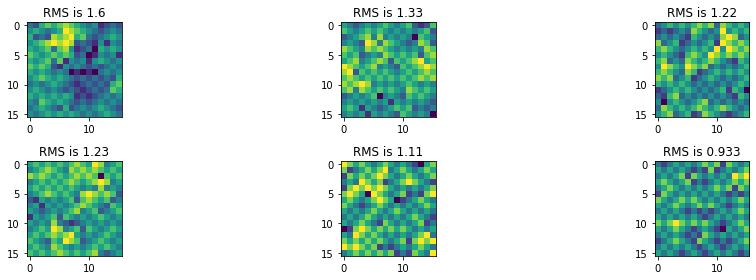

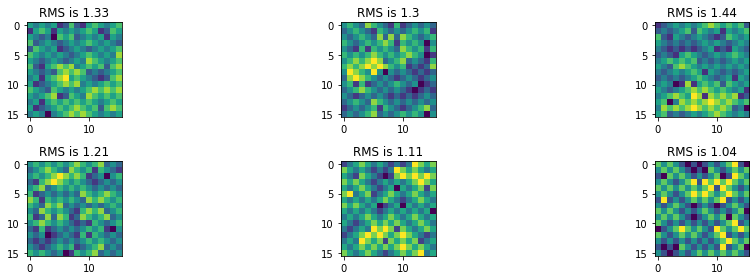

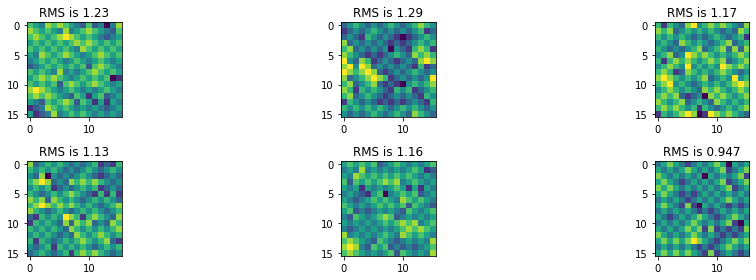

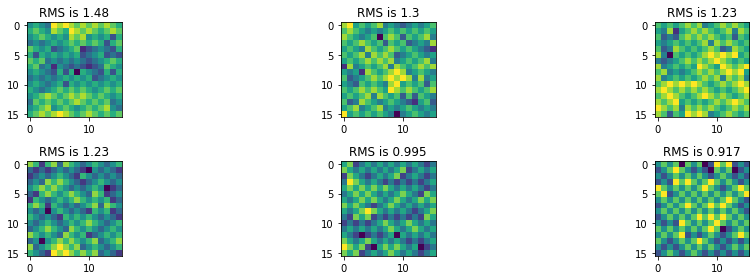

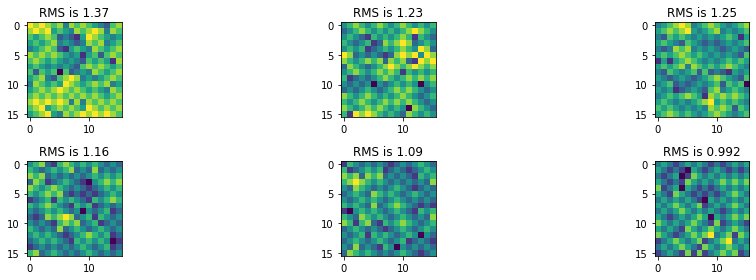

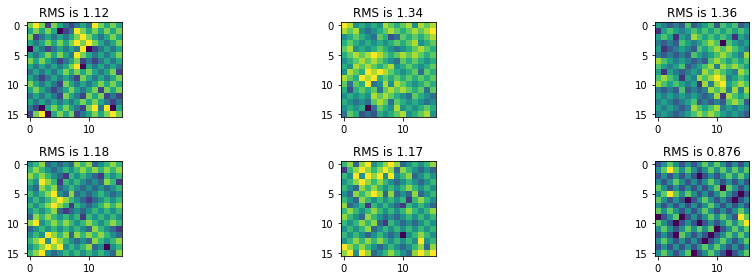

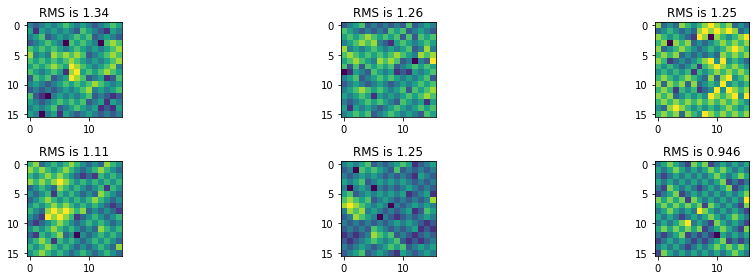

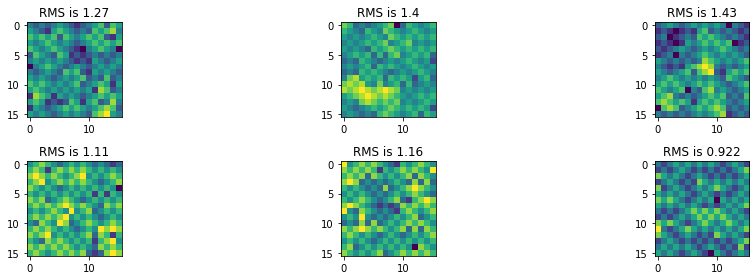

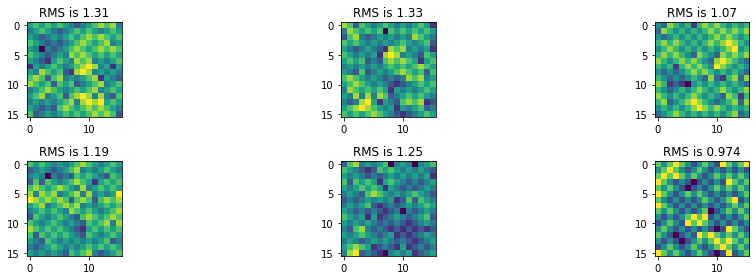

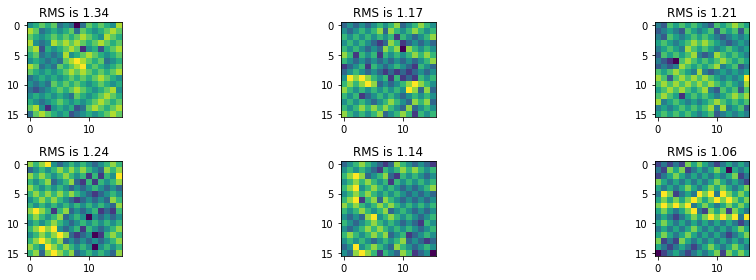

In [25]:
full_results = []

for k in tqdm(range(10)):

    diffusion_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.9]
    dep_rates = [0.55, 0.55]

    fig, axes = plt.subplots(nrows=2,ncols=3, figsize = (15,4))
    rewards = []
    for ind, ax in enumerate(axes.flat):

        env.reset()
        current_rates = env.sim.kmc.etree.rates

        new_rates = [dep_rates[0], dep_rates[1], diffusion_rates[ind],diffusion_rates[ind],diffusion_rates[ind]]

        env.sim.update_rate(np.array(new_rates))
        env.sim.run()
        state, reward = get_state_reward(env.sim, env.sim.kmc.latt, target_roughness)
        ax.imshow(state[0])
        #ax.imshow(state[0])
        rms = calc_roughness(state[0])
        ax.set_title('RMS is {:.3}'.format(rms));
        rewards.append(rms)

    plt.tight_layout()
    full_results.append(rewards)
    


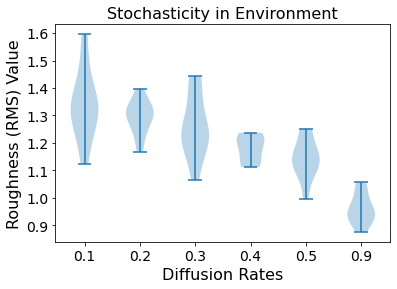

In [30]:
full_results = np.array(full_results)

plt.figure()
plt.violinplot(full_results);
plt.xlabel('Diffusion Rates', fontsize = 16)
plt.xticks([1,2,3,4,5,6], ['0.1', '0.2', '0.3', '0.4', '0.5', '0.9'], fontsize = 14)
plt.ylabel('Roughness (RMS) Value', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Stochasticity in Environment', fontsize = 16)

fig_file_path = os.path.join(results_folder,'Stochasticity.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)

# Plot the SVPG and A2C Results

In [31]:
folder_A2C = os.path.join(results_folder, 'A2C_Results_Run=1')
folder_SVPG = os.path.join(results_folder, 'A2C_SVPG_CNETUpdates_Results_Run=1')

A2C_results_files = [file for file in os.listdir(folder_A2C) if 'reward_results' in file]
A2C_results_files.sort()

SVPG_conv_results_files = [file for file in os.listdir(folder_SVPG) if 'reward_results' in file]
SVPG_conv_results_files.sort()

#Load data

A2C_results_data = []
SVPG_conv_results_data = []
SVPG_noconv_results_data = []

for file in A2C_results_files:
    file_path = os.path.join(folder_A2C, file)
    A2C_results_data.append(np.loadtxt(file_path))

for file in SVPG_conv_results_files:
    file_path = os.path.join(folder_SVPG, file)
    SVPG_conv_results_data.append(np.loadtxt(file_path))

A2C_results_data = np.array(A2C_results_data)
SVPG_conv_results_data = np.array(SVPG_conv_results_data)

Text(0.5, 1.0, 'Mean Rewards')

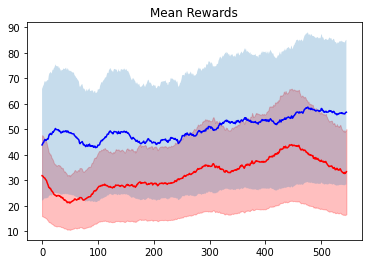

In [32]:
k_smooth = 55

mean_prof = smooth_window(np.nanmean(A2C_results_data[:,:],axis=0),k_smooth)
std_prof = smooth_window(np.nanmean(A2C_results_data[:,:],axis=0),k_smooth)

mean_svpg_prof = smooth_window(np.nanmean(SVPG_conv_results_data[:,:],axis=0),k_smooth)
std_svpg_prof = smooth_window(np.nanmean(SVPG_conv_results_data[:,:],axis=0),k_smooth)

plt.figure()
plt.plot(mean_prof, 'r-')
plt.fill_between(np.arange(0, len(mean_prof)), mean_prof+0.5*std_prof, mean_prof-0.5*std_prof, alpha = 0.25, color='r')
plt.plot(mean_svpg_prof, 'b-')
plt.fill_between(np.arange(0, len(mean_prof)), mean_svpg_prof+0.5*std_svpg_prof, mean_svpg_prof-0.5*std_svpg_prof, alpha = 0.25)

plt.title('Mean Rewards')

Top four agents are [ 0 14  7  3]


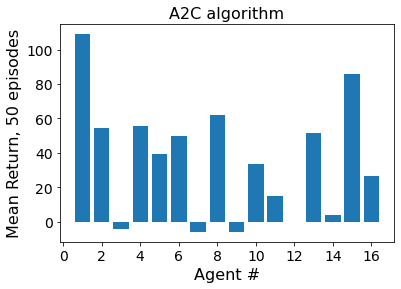

In [33]:
mean_agent_results = np.nanmean(A2C_results_data[:,-100:], axis=1)
top_four_A2C_agents = np.argsort(mean_agent_results)[::-1][:4]
bottom_four_A2C_agents = np.argsort(mean_agent_results)[::-1][4:8]

plt.figure()
plt.bar(np.arange(1,17), mean_agent_results)
plt.xlabel('Agent #', fontsize = 16)
plt.ylabel('Mean Return, 50 episodes', fontsize = 16)
plt.title('A2C algorithm', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

print('Top four agents are {}'.format(top_four_A2C_agents))

Top four agents are [ 8 12  5  7]


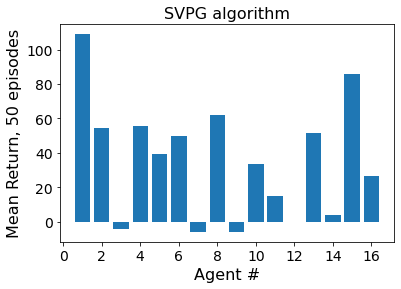

In [34]:
mean_svpg_agent_results = np.nanmean(SVPG_conv_results_data[:,-50:], axis=1)
top_four_SVPG_agents = np.argsort(mean_svpg_agent_results)[::-1][:4]
bottom_four_SVPG_agents = np.argsort(mean_svpg_agent_results)[::-1][4:8]

plt.figure()
plt.bar(np.arange(1,17), mean_agent_results)
plt.xlabel('Agent #', fontsize = 16)
plt.ylabel('Mean Return, 50 episodes', fontsize = 16)
plt.title('SVPG algorithm', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

print('Top four agents are {}'.format(top_four_SVPG_agents))

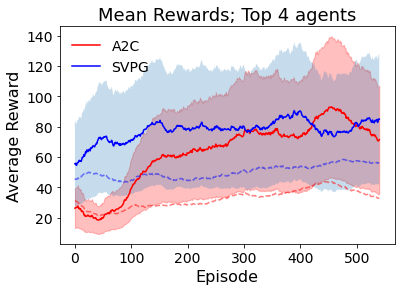

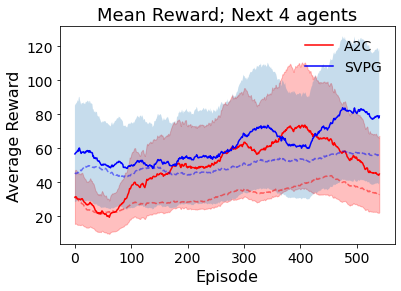

In [35]:
k_smooth = 60

mean_A2C_prof = smooth_window(np.nanmean(A2C_results_data[:,:],axis=0),k_smooth)
mean_SVPG_prof = smooth_window(np.nanmean(SVPG_conv_results_data[:,:],axis=0),k_smooth)

mean_prof = smooth_window(np.nanmean(A2C_results_data[top_four_A2C_agents,:],axis=0),k_smooth)
std_prof = smooth_window(np.nanmean(A2C_results_data[top_four_A2C_agents,:],axis=0),k_smooth)

mean_svpg_prof = smooth_window(np.nanmean(SVPG_conv_results_data[top_four_SVPG_agents,:],axis=0),k_smooth)
std_svpg_prof = smooth_window(np.nanmean(SVPG_conv_results_data[top_four_SVPG_agents,:],axis=0),k_smooth)


plt.figure()
plt.plot(mean_prof, 'r-', label = 'A2C')
plt.fill_between(np.arange(0, len(mean_prof)), mean_prof+0.5*std_prof, mean_prof-0.5*std_prof, alpha = 0.25, color='r')
plt.plot(mean_svpg_prof, 'b-', label = 'SVPG')
plt.plot(mean_A2C_prof, 'r--', alpha = 0.5)
plt.plot(mean_SVPG_prof, 'b--', alpha = 0.5)
plt.fill_between(np.arange(0, len(mean_prof)), mean_svpg_prof+0.5*std_svpg_prof, mean_svpg_prof-0.5*std_svpg_prof, alpha = 0.25)
plt.legend(loc = 'upper left', fontsize = 14, frameon=False)

plt.title('Mean Rewards; Top 4 agents', fontsize = 18)
plt.xlabel('Episode', fontsize = 16)
plt.ylabel('Average Reward', fontsize = 16)
plt.xticks(fontsize = 14)    
plt.yticks(fontsize = 14)   
fig_file_path = os.path.join(results_folder,'Top4Agents_learning.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)

mean_prof = smooth_window(np.nanmean(A2C_results_data[bottom_four_A2C_agents,:],axis=0),k_smooth)
std_prof = smooth_window(np.nanmean(A2C_results_data[bottom_four_A2C_agents,:],axis=0),k_smooth)

mean_svpg_prof = smooth_window(np.nanmean(SVPG_conv_results_data[bottom_four_SVPG_agents,:],axis=0),k_smooth)
std_svpg_prof = smooth_window(np.nanmean(SVPG_conv_results_data[bottom_four_SVPG_agents,:],axis=0),k_smooth)

plt.figure()
plt.plot(mean_prof, 'r-', label = 'A2C')
plt.fill_between(np.arange(0, len(mean_prof)), mean_prof+0.5*std_prof, mean_prof-0.5*std_prof, alpha = 0.25, color='r')
plt.plot(mean_svpg_prof, 'b-', label = 'SVPG')
plt.fill_between(np.arange(0, len(mean_prof)), mean_svpg_prof+0.5*std_svpg_prof, mean_svpg_prof-0.5*std_svpg_prof, alpha = 0.25)
plt.plot(mean_A2C_prof, 'r--', alpha = 0.5)
plt.plot(mean_SVPG_prof, 'b--', alpha = 0.5)

plt.title('Mean Reward; Next 4 agents', fontsize = 18)
plt.xlabel('Episode', fontsize = 16)
plt.ylabel('Average Reward', fontsize = 16)
plt.xticks(fontsize = 14)    
plt.yticks(fontsize = 14)    
plt.legend(loc = 'upper right', fontsize = 14, frameon=False)

fig_file_path = os.path.join(results_folder,'Next4Agents_learning.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)



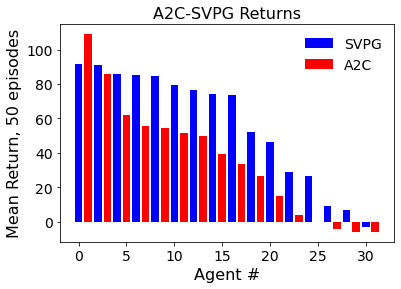

In [36]:
mean_agent_results_svpg = np.nanmean(SVPG_conv_results_data[:,-50:], axis=1)

plt.figure()
plt.bar(np.arange(0,32,2), np.sort(mean_agent_results_svpg)[::-1], color = 'b', label = 'SVPG')
plt.bar(np.arange(1,32,2), np.sort(mean_agent_results)[::-1], color = 'r', alpha = 1, label = 'A2C')
plt.xlabel('Agent #', fontsize = 16)
plt.ylabel('Mean Return, 50 episodes', fontsize = 16)
plt.title('A2C-SVPG Returns', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc='best', fontsize = 14, frameon=False)

fig_file_path = os.path.join(results_folder,'A2CSVPG_returns.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)


# Testing Phase

Next, Let's test the best performing agents in the environment against a random policy

In [8]:
target_roughness=0.80
wdir = r'../kmc_env/envs/data' #working director for the simulations. 
env = KmcEnv(target_roughness=target_roughness,
             reward_type='gaussian',reward_multiplier=50,reward_tolerance=0.07,
             rates_spread=0.1,rates_adjustment=5,folder_with_params=wdir)

In [48]:
num_episodes = 50
rmsvals=[]
rmsvals_random = []
rmsvals_svpg = []
rates = []
rates_svpg = []

actor_critic_model_svpg = NeuralNet_A2C()
actor_critic_model = NeuralNet_A2C()

#We are choosing the best agents here. If you ran the SVPG code then you should adjust 
#the filenames below so that you choose the highest performing agents...

actor_critic_agent_weights = os.path.join(results_folder, 'A2C_Results_Run=1/Actor_agent_0400.h5')
actor_critic_svpg_weights = os.path.join(results_folder, 'A2C_SVPG_CNETUpdates_Results_Run=1/Actor_agent_8400.h5')

actor_critic_model.actor.load_weights(actor_critic_agent_weights) 

actor_critic_model_svpg.actor.load_weights(actor_critic_svpg_weights) 

env = KmcEnv(target_roughness=target_roughness,
             reward_type='gaussian',reward_multiplier=50,reward_tolerance=0.07,
             rates_spread=0.1,rates_adjustment=5,folder_with_params=wdir)

for episode in tqdm(range(num_episodes)):
    
    state, _ = env.reset(mode = 'hard')
    reward_total=0
    done = False
    #A2C actor
    while not done:

        #Take an action
        if state[0].shape[0] == 16:
            state = [state[0][None,:,:,None], state[1]]
        
        actions_output = actor_critic_model.actor(state)
        actions_output = tf.reshape(actions_output, (-1,3,2))
        
        #actions are given by mu, sigma (action_dims x 2) tensor
        
        #Sample the policy to get the action
        output_actions = np.zeros(shape=(3,))
        output_action = tfp.distributions.MultivariateNormalDiag(
                actions_output[0,:,0], tf.nn.softplus(actions_output[0,:,1])).sample(1)

        output_actions = np.squeeze(tf.clip_by_value(output_action, -10, 10).numpy())
       
       
        #Take the selected action in the environment
        next_state, reward, done = env.step(output_actions) 
        
        new_rates = env.sim.kmc.etree.rates
        temp = env.sim.kmc.temp
        
        next_state = [next_state[0][None,:,:,None], next_state[1]]
        
        reward_total+=reward
        
        rmsval = calc_roughness(state[0][0,:,:,0])  
        rmsvals.append(rmsval)
        rates.append(np.append(np.array(new_rates[:2]), temp))
        
        state = next_state
        
    if episode%1==0:
        print(episode, reward_total, rmsvals[-6], rmsvals[-1])

for episode in tqdm(range(num_episodes)):
    state, _ = env.reset(mode = 'hard')
    done=False
    reward_total=0
    
    #Random actor
    while not done:

        #Take an action
        if state[0].shape[0] == 16:
            state = [state[0][None,:,:,None], state[1]]
        
        actions_output = np.random.uniform(low=-10, high = 10, size = (6,))
        actions_output = tf.reshape(actions_output, (-1,3,2))
        
        #actions are given by mu, sigma (action_dims x 2) tensor
        
        #Sample the policy to get the action
        output_actions = np.zeros(shape=(3,))
        output_action = tfp.distributions.MultivariateNormalDiag(
                actions_output[0,:,0], tf.nn.softplus(actions_output[0,:,1])).sample(1)

        output_actions = np.squeeze(tf.clip_by_value(output_action, -10, 10).numpy())
       
        #Take the selected action in the environment
        next_state, reward, done = env.step(output_actions) 
        
        next_state = [next_state[0][None,:,:,None], next_state[1]]
        
        reward_total+=reward
        
        rmsval = calc_roughness(state[0][0,:,:,0])  
        rmsvals_random.append(rmsval)
        
        state = next_state

for episode in tqdm(range(num_episodes)):
    
    done=False
    state, _ = env.reset(mode = 'hard')
    reward_total=0
    
    #SVPG actor
    while not done:

        #Take an action
        if state[0].shape[0] == 16:
            state = [state[0][None,:,:,None], state[1]]

        actions_output = actor_critic_model_svpg.actor(state)
        actions_output = tf.reshape(actions_output, (-1,3,2))
        #actions are given by mu, sigma (action_dims x 2) tensor
        
        #Sample the policy to get the action
        output_actions = np.zeros(shape=(3,))
        output_action = tfp.distributions.MultivariateNormalDiag(
                actions_output[0,:,0], tf.nn.softplus(actions_output[0,:,1])).sample(1)

        output_actions = np.squeeze(tf.clip_by_value(output_action, -10, 10).numpy())
       
        #Take the selected action in the environment
        next_state, reward, done = env.step(output_actions) 
        
        new_rates = env.sim.kmc.etree.rates
        temp = env.sim.kmc.temp
        
        next_state = [next_state[0][None,:,:,None], next_state[1]]
        
        reward_total+=reward
        
        rmsval = calc_roughness(state[0][0,:,:,0])  
        rmsvals_svpg.append(rmsval)
        rates_svpg.append(np.append(np.array(new_rates[:2]), temp))
        
        state = next_state

  2%|▏         | 1/50 [00:05<04:07,  5.06s/it]

0 -5.8821315790051205 0.6909978490152846 0.7060269974255587


  4%|▍         | 2/50 [00:15<05:14,  6.54s/it]

1 82.72310067574311 0.8441839162025062 0.8451594131249737


  6%|▌         | 3/50 [00:23<05:35,  7.14s/it]

2 55.431675732464505 0.7313768586542782 0.7180278301317784


  8%|▊         | 4/50 [00:35<06:27,  8.43s/it]

3 162.86068702338184 0.8832963275955301 0.8300022943304133


 10%|█         | 5/50 [00:48<07:22,  9.84s/it]

4 134.75753299013883 0.9555233656712692 0.8148628503274339


 12%|█▏        | 6/50 [01:02<08:18, 11.33s/it]

5 129.01820135273204 0.8522431339559152 0.7537341934495211


 14%|█▍        | 7/50 [01:20<09:29, 13.24s/it]

6 79.96158553641193 0.8154618491037763 0.750610103411718


 16%|█▌        | 8/50 [01:36<09:51, 14.08s/it]

7 119.50388730996033 0.7874364433678124 0.7472279500761464


 18%|█▊        | 9/50 [01:49<09:21, 13.70s/it]

8 28.86492357898431 0.7749747979773278 0.7179003129787589


 20%|██        | 10/50 [02:09<10:26, 15.67s/it]

9 125.9326632360768 0.9222721602108567 0.8254674338670182


 22%|██▏       | 11/50 [02:26<10:22, 15.97s/it]

10 3.743058552155267 0.7384775697973162 0.6929824019230214


 24%|██▍       | 12/50 [02:43<10:17, 16.26s/it]

11 142.87097389530368 0.8127628781469722 0.7653060560161535


 26%|██▌       | 13/50 [02:58<09:47, 15.88s/it]

12 156.17198072760863 0.7459198913925007 0.8285302664017471


 28%|██▊       | 14/50 [03:10<08:54, 14.86s/it]

13 25.910430773949376 0.7485337229377178 0.6356514252127498


 30%|███       | 15/50 [03:28<09:04, 15.56s/it]

14 197.56295917703926 0.8609360821222444 0.7904149918713587


 32%|███▏      | 16/50 [03:45<09:09, 16.15s/it]

15 62.84295886478773 0.9211795576019639 0.7119241093684073


 34%|███▍      | 17/50 [04:02<09:03, 16.47s/it]

16 62.04526169401592 0.8893562783517919 0.8569568250501305


 36%|███▌      | 18/50 [04:17<08:27, 15.86s/it]

17 175.0428446459396 0.7917651734218613 0.80145741270201


 38%|███▊      | 19/50 [04:26<07:08, 13.82s/it]

18 41.985503606816216 0.8332682266233364 0.653827373528365


 40%|████      | 20/50 [04:42<07:12, 14.42s/it]

19 114.43131252661767 0.7473912964438374 0.7414469990118984


 42%|████▏     | 21/50 [05:02<07:51, 16.26s/it]

20 101.75688543974805 0.9016247812109813 0.8788628461504958


 44%|████▍     | 22/50 [05:16<07:18, 15.66s/it]

21 194.68678172527714 0.7246699140815769 0.8115604543678493


 46%|████▌     | 23/50 [05:35<07:22, 16.40s/it]

22 130.61008148142417 0.8184502671780064 0.82915619758885


 48%|████▊     | 24/50 [05:52<07:11, 16.58s/it]

23 101.23571391437937 0.9249155366842964 0.7574096867572727


 50%|█████     | 25/50 [06:05<06:33, 15.73s/it]

24 24.441414760373306 0.7563210193925592 0.7327108804808347


 52%|█████▏    | 26/50 [06:19<06:03, 15.14s/it]

25 207.52086911185276 0.8242835430693737 0.7842131307081003


 54%|█████▍    | 27/50 [06:33<05:36, 14.63s/it]

26 183.2689721187005 0.779333587011204 0.759662689845796


 56%|█████▌    | 28/50 [06:48<05:28, 14.95s/it]

27 155.18492695223793 1.0066914792402883 0.8267603732906833


 58%|█████▊    | 29/50 [07:03<05:15, 15.02s/it]

28 142.52081882361233 0.9098795850962917 0.8454843286542927


 60%|██████    | 30/50 [07:12<04:24, 13.23s/it]

29 53.78107703207225 0.6222105721488104 0.7749747979773278


 62%|██████▏   | 31/50 [07:28<04:23, 13.87s/it]

30 160.8477679555245 0.8425917976695477 0.7758799817586158


 64%|██████▍   | 32/50 [07:45<04:24, 14.70s/it]

31 109.14030684817689 0.8463141016157949 0.8278301361843503


 66%|██████▌   | 33/50 [07:54<03:40, 12.99s/it]

32 -5.6742387870937145 0.8002380017063674 0.6887417762666934


 68%|██████▊   | 34/50 [08:06<03:24, 12.79s/it]

33 130.5073116143818 0.8574908322214004 0.7660633311572549


 70%|███████   | 35/50 [08:20<03:19, 13.31s/it]

34 25.278956271219663 0.9249155366842964 0.8681371489430688


 72%|███████▏  | 36/50 [08:31<02:54, 12.46s/it]

35 54.55199849104769 0.7459198913925007 0.7638292077380584


 74%|███████▍  | 37/50 [08:43<02:41, 12.43s/it]

36 108.21733214631924 0.9205498951034647 0.7601847534481339


 76%|███████▌  | 38/50 [08:54<02:22, 11.85s/it]

37 2.2602649032070348 0.7892945203431669 0.6222105721488104


 78%|███████▊  | 39/50 [09:06<02:12, 12.07s/it]

38 122.93746442895821 0.9206493441282354 0.7173900177030623


 80%|████████  | 40/50 [09:23<02:14, 13.40s/it]

39 176.79121358586622 0.9139957240566008 0.7880950133074057


 82%|████████▏ | 41/50 [09:41<02:14, 14.94s/it]

40 116.8289771286118 0.878897569401577 0.7473912964438374


 84%|████████▍ | 42/50 [09:55<01:56, 14.60s/it]

41 82.76155270034738 0.7273601132692114 0.7180278301317784


 86%|████████▌ | 43/50 [10:09<01:41, 14.48s/it]

42 238.52204669729582 0.8373236171539353 0.7779618302815376


 88%|████████▊ | 44/50 [10:16<01:12, 12.10s/it]

43 -5.8442075745460125 0.673145600891813 0.7069341266164761


 90%|█████████ | 45/50 [10:29<01:02, 12.40s/it]

44 124.23026798928055 0.8279407224214484 0.8100925873009825


 92%|█████████▏| 46/50 [10:41<00:48, 12.23s/it]

45 200.15643798668845 0.8471790851666193 0.7899515412352837


 94%|█████████▍| 47/50 [10:49<00:33, 11.03s/it]

46 35.803342198797395 0.7366984521328928 0.6901582132924305


 96%|█████████▌| 48/50 [10:59<00:21, 10.70s/it]

47 75.59735977310521 0.8123497457222474 0.856386850377795


 98%|█████████▊| 49/50 [11:05<00:09,  9.36s/it]

48 33.10640224214808 0.6817945071647321 0.7149611413173096


  0%|          | 0/50 [00:00<?, ?it/s]

49 167.22890248780956 0.8003905296791061 0.7879401051951855


100%|██████████| 50/50 [10:01<00:00, 10.61s/it]


# Plot results of the testing

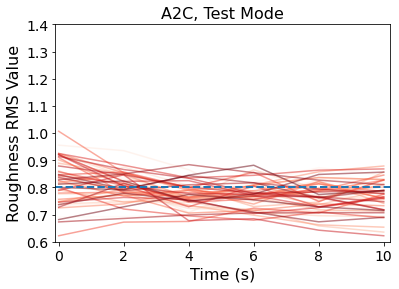

In [52]:
rmsvals = np.array(rmsvals)
blues = plt.cm.get_cmap('Reds',num_episodes)
plt.figure()
for k in range(num_episodes):
    plt.plot(np.arange(0,12,2), rmsvals[k*6:(k+1)*6], color = blues(k), alpha = 0.5)
plt.axhline(y = target_roughness, linestyle='--', linewidth = 2.0)
plt.title('A2C, Test Mode', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Roughness RMS Value', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([0.6, 1.4])
plt.xlim([-0.1,10.2])

fig_file_path = os.path.join(results_folder,'A2C_results.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)

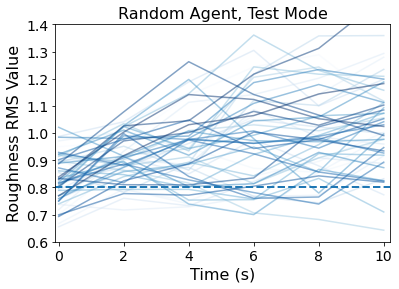

In [53]:
rmsvals_random = np.array(rmsvals_random)
blues = plt.cm.get_cmap('Blues',num_episodes)
plt.figure()
for k in range(num_episodes):
    plt.plot(np.arange(0,12,2), rmsvals_random[k*6:(k+1)*6], color = blues(k), alpha= 0.5)
plt.axhline(y = target_roughness, linestyle='--', linewidth = 2.0)

plt.title('Random Agent, Test Mode', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Roughness RMS Value', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([0.6, 1.4])
plt.xlim([-0.1,10.2])

fig_file_path = os.path.join(results_folder,'random_results.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)

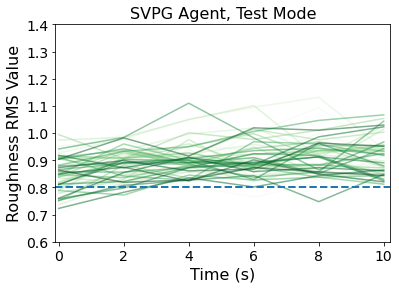

In [54]:
rmsvals_svpg = np.array(rmsvals_svpg)
blues = plt.cm.get_cmap('Greens',num_episodes)
plt.figure()
for k in range(num_episodes):
    plt.plot(np.arange(0,12,2), rmsvals_svpg[k*6:(k+1)*6], color = blues(k), alpha = 0.5)
plt.axhline(y = target_roughness, linestyle='--', linewidth = 2.0)

plt.title('SVPG Agent, Test Mode', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Roughness RMS Value', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([0.6, 1.4])
plt.xlim([-0.1,10.2])

fig_file_path = os.path.join(results_folder,'SVPG_results.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)

In [14]:
np.mean(rmsvals_svpg), np.mean(rmsvals_random),  np.mean(rmsvals)

(0.8856328029923989, 0.9177498562665577, 0.7860945554406188)

# Testing Mode Diagnostics - Seeing what was learned

In [16]:
#Let's run the agents through for 10 episodes and inspect the policies

num_episodes = 10
rmsvals=[]
rates = []

state_history = []
reward_history = []
svpg_reward_history = []
rmsvals_svpg = []
actions_history = []
actions_history_svpg = []
state_history_svpg = []

for episode in tqdm(range(num_episodes)):
    
    state, _ = env.reset(mode = 'hard')
    env1=deepcopy(env)
    state_initial = np.copy(state)
    
    reward_total=0

    done = False
    
    #A2C actor
    while not done:

        #Take an action
        if state[0].shape[0] == 16:
            state = [state[0][None,:,:,None], state[1]]
        
        actions_output = actor_critic_model.actor(state)
        actions_output = tf.reshape(actions_output, (-1,3,2))
        
        #actions are given by mu, sigma (action_dims x 2) tensor
        
        #Sample the policy to get the action
        output_actions = np.zeros(shape=(3,))
        output_action = tfp.distributions.MultivariateNormalDiag(
                actions_output[0,:,0], tf.nn.softplus(actions_output[0,:,1])).sample(1)

        output_actions = np.squeeze(tf.clip_by_value(output_action, -10, 10).numpy())
        actions_history.append(actions_output)
        #Take the selected action in the environment
        next_state, reward, done = env.step(output_actions) 
        
        new_rates = env.sim.kmc.etree.rates
        temp = env.sim.kmc.temp
        rates.append(np.append(np.array(new_rates[:2]), temp))

        
        next_state = [next_state[0][None,:,:,None], next_state[1]]
        if done: reward = reward*5
        reward_total+=reward
        
        
        state_history.append(state)
        state = next_state
        
        rmsval = calc_roughness(state[0][0,:,:,0])  
        rmsvals.append(rmsval)
        reward_history.append(reward)
    
    if episode%1==0:
        print('\nA2C actor results---\n')
        print(episode, reward_total, rmsvals[-6], rmsvals[-1])
    
    done = False
    reward_total=0
    state = state_initial
    #SVPG actor
    while not done:

        #Take an action
        if state[0].shape[0] == 16:
            state = [state[0][None,:,:,None], state[1]]
        
        #actions_output = actor_critic_model.actor(state)
        actions_output = actor_critic_model_svpg.actor(state)
        actions_output = tf.reshape(actions_output, (-1,3,2))
        
        actions_history_svpg.append(actions_output)
        #actions are given by mu, sigma (action_dims x 2) tensor
        
        #Sample the policy to get the action
        output_actions = np.zeros(shape=(3,))
        output_action = tfp.distributions.MultivariateNormalDiag(
                actions_output[0,:,0], tf.nn.softplus(actions_output[0,:,1])).sample(1)

        output_actions = np.squeeze(tf.clip_by_value(output_action, -10, 10).numpy())
       
        #Take the selected action in the environment
        next_state, reward, done = env1.step(output_actions) 
        new_rates = env1.sim.kmc.etree.rates
        temp = env1.sim.kmc.temp
        rates_svpg.append(np.append(np.array(new_rates[:2]), temp))
        
        if done: reward = reward*5
        next_state = [next_state[0][None,:,:,None], next_state[1]]
        
        reward_total+=reward
        state_history_svpg.append(state)
        state = next_state
        
        rmsval = calc_roughness(state[0][0,:,:,0])  
        rmsvals_svpg.append(rmsval)
    
        svpg_reward_history.append(reward)
    
    if episode%1==0:
        print('\nSVPG actor results---\n')
        print(episode, reward_total, rmsvals_svpg[-6], rmsvals_svpg[-1])
    

  0%|          | 0/10 [00:00<?, ?it/s]


A2C actor results---

0 325.15638177378906 0.7979465834252315 0.7817186094593118


 10%|█         | 1/10 [00:19<02:57, 19.73s/it]


SVPG actor results---

0 172.7837905355824 0.8556738481308167 0.833524554883508

A2C actor results---

1 323.9012377560317 0.8636258503397174 0.8171441790620552


 20%|██        | 2/10 [00:46<02:55, 21.94s/it]


SVPG actor results---

1 54.18357007832539 0.9088056637009917 0.8430263100135131

A2C actor results---

2 351.93126813624286 0.9442142380539228 0.809753470874778


 30%|███       | 3/10 [01:12<02:41, 23.14s/it]


SVPG actor results---

2 -9.999999925365817 1.0523121399298547 0.9691279504662942

A2C actor results---

3 34.48325146747673 0.7394687044383623 0.7498372219188641


 40%|████      | 4/10 [01:27<02:03, 20.65s/it]


SVPG actor results---

3 147.63695023401593 0.8491939537548239 0.8425917976695477

A2C actor results---

4 -1.7405544148332757 0.7459198913925007 0.6547602137424051


 50%|█████     | 5/10 [01:43<01:36, 19.26s/it]


SVPG actor results---

4 121.90974166253814 0.8278301361843503 0.8699631816921909

A2C actor results---

5 303.79463020972526 0.9268931218727432 0.8026749711900827


 60%|██████    | 6/10 [02:06<01:21, 20.50s/it]


SVPG actor results---

5 -9.99615234630486 0.9636964965693297 0.9163965925535461

A2C actor results---

6 90.28520312245921 0.8252825628799811 0.7206157848500129


 70%|███████   | 7/10 [02:27<01:01, 20.41s/it]


SVPG actor results---

6 -5.921912858434181 0.9161301400967823 0.8726251253402001

A2C actor results---

7 124.91460008747708 0.8552100779011844 0.8518133231524382


 80%|████████  | 8/10 [02:49<00:42, 21.01s/it]


SVPG actor results---

7 -9.403446315724423 0.8819132588263712 0.8907277901209494

A2C actor results---

8 -8.025648087226394 0.7335434121440939 0.703949169751446


 90%|█████████ | 9/10 [03:04<00:19, 19.05s/it]


SVPG actor results---

8 176.5638507845807 0.8267972847076845 0.834402796821625

A2C actor results---

9 83.24748043400349 0.7779618302815376 0.6985965283158799


100%|██████████| 10/10 [03:23<00:00, 19.07s/it]


SVPG actor results---

9 -6.502356817140389 0.9596345332990055 0.9182595948824874


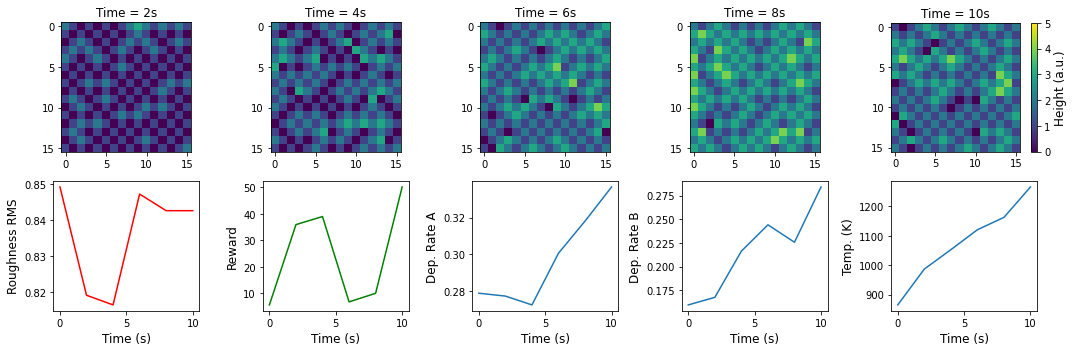

In [38]:
#Let's see how one of these progressed. Choose a run and plot the results
k = 3 #run number chosen.

fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (15,5))
ind_vals = np.arange((k*6),(k+1)*6)

for ind in range(5):
    
    im1 = axes[0,ind].imshow(state_history_svpg[ind_vals[ind]][0][0,:,:,0], vmin = 0, vmax = 5.0)
    axes[0,ind].set_title('Time = {}s'.format((ind+1)*2))

divider = make_axes_locatable(axes[0,4])
cax = divider.append_axes('right', size='5%', pad=0.15)
cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
cbar.ax.set_ylabel('Height (a.u.)', fontsize = 12)

axes[1,0].plot(np.arange(0,12,2), rmsvals_svpg[k*6:(k+1)*6], 'r-')
axes[1,0].set_ylabel('Roughness RMS', fontsize = 12)

axes[1,1].plot(np.arange(0,12,2), svpg_reward_history[k*6:(k+1)*6], 'g-')
axes[1,1].set_ylabel('Reward', fontsize = 12)

axes[1,2].plot(np.arange(0,12,2), np.array(rates_svpg[k*6:(k+1)*6])[:,0])
axes[1,2].set_ylabel('Dep. Rate A', fontsize = 12)

axes[1,3].plot(np.arange(0,12,2), np.array(rates_svpg[k*6:(k+1)*6])[:,1])
axes[1,3].set_ylabel('Dep. Rate B', fontsize = 12)

temps_prof = np.array(rates_svpg[k*6:(k+1)*6])[:,2]
temps_prof = np.clip(temps_prof, 300, 1400)
axes[1,4].plot(np.arange(0,12,2), temps_prof)
axes[1,4].set_ylabel('Temp. (K)', fontsize = 12)

for ind in range(5): axes[1,ind].set_xlabel('Time (s)', fontsize = 12)
    
fig.tight_layout()


fig_file_path = os.path.join(results_folder,'SVPG_profile.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)


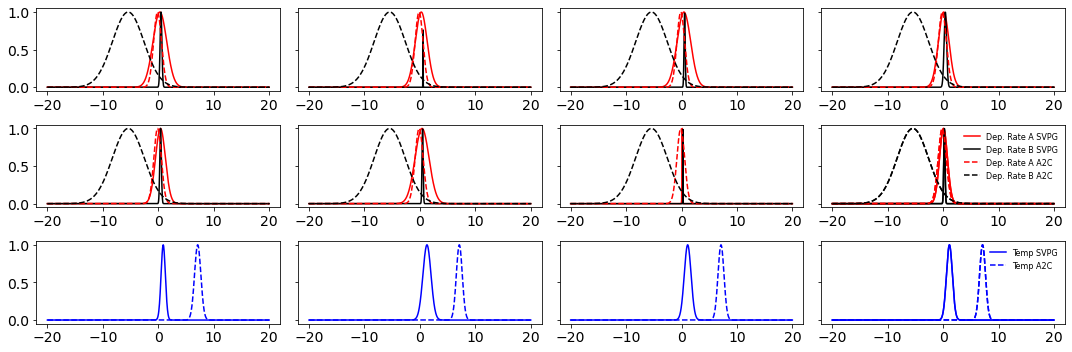

In [47]:
x = np.linspace(-20,20,1000)
chosen_states = np.random.choice(np.arange(len(state_history_svpg)), 15, replace = False)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (15,5), sharey=True)
for ind, ax in enumerate(axes.flat):
    
    state_input = state_history_svpg[chosen_states[ind]]
    actions_output_svpg = actor_critic_model_svpg.actor(state_input).numpy()
    actions_output_a2c = actor_critic_model.actor(state_input).numpy()
    if ind<8:
        #Plot SVPG Result
        ax.plot(x, gaussian(x, actions_output_svpg[0,0], actions_output_svpg[0,1]), 'r-')
        ax.plot(x, gaussian(x, actions_output_svpg[0,2], actions_output_svpg[0,3]), 'k-')

        #Plot A2C Result
        ax.plot(x, gaussian(x, actions_output_a2c[0,0], actions_output_a2c[0,1]), 'r--')
        ax.plot(x, gaussian(x, actions_output_a2c[0,2], actions_output_a2c[0,3]), 'k--')
        
        if ind==7:
            ax.plot(x, gaussian(x, actions_output_svpg[0,0], actions_output_svpg[0,1]), 'r-',
                    label = 'Dep. Rate A SVPG')
            ax.plot(x, gaussian(x, actions_output_svpg[0,2], actions_output_svpg[0,3]), 'k-',
                    label = 'Dep. Rate B SVPG')

            #Plot A2C Result
            ax.plot(x, gaussian(x, actions_output_a2c[0,0], actions_output_a2c[0,1]),
                    'r--', label = 'Dep. Rate A A2C')
            ax.plot(x, gaussian(x, actions_output_a2c[0,2], actions_output_a2c[0,3]),
                    'k--', label = 'Dep. Rate B A2C')
    else:
        
        #Plot SVPG Temperature result
        ax.plot(x, gaussian(x, actions_output_svpg[0,4], actions_output_svpg[0,5]), 'b-')
        
        #Plot A2C Result
        ax.plot(x, gaussian(x, actions_output_a2c[0,4], actions_output_a2c[0,5]), 'b--')
        
        if ind ==11:
            #Plot SVPG Temperature result
            ax.plot(x, gaussian(x, actions_output_svpg[0,4], actions_output_svpg[0,5]), 'b-', label = 'Temp SVPG')

            #Plot A2C Result
            ax.plot(x, gaussian(x, actions_output_a2c[0,4], actions_output_a2c[0,5]), 'b--', label = 'Temp A2C')
        
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(14) 
        
    
axes[1,-1].legend(loc='best', frameon = False, fontsize = 8)
axes[2,-1].legend(loc='best', frameon = False, fontsize = 8)

fig.tight_layout()

fig_file_path = os.path.join(results_folder,'Actions_output.svg' )
plt.savefig(fig_file_path, bbox_inches = 'tight', pad_inches = 2.0)